This notebooks plots the diagrams for the [5th value proposition](https://www.notion.so/mortynia/VP5-Refactored-task-space-78509192c47b47b29d20ea7d272a6060), refactored task space.

In [100]:
# figure 1: number of tasks per publication

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('paper', 'whitegrid')  # noqa

from python.cogtext.datasets.pubmed import PubMedDataLoader

# load the data
PUBMED = PubMedDataLoader(preprocessed=False).load()

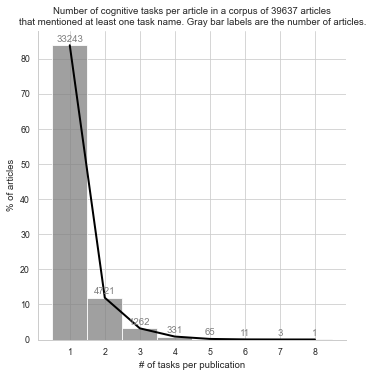

In [172]:
# number of tasks per study

task_counts_by_pmids = PUBMED.query('category.str.contains("Task")').groupby('pmid')[['category','label']].count()
task_counts_by_pmids['label'] = task_counts_by_pmids['label'].astype('category')

n_pubs = PUBMED.query('category.str.contains("Task")')['pmid'].nunique()

task_cnts = task_counts_by_pmids.value_counts().to_frame()
task_pcts = task_cnts * 100 / n_pubs

sns.displot(task_counts_by_pmids['label'],
            color='gray',
            stat='percent',
            aspect=1).set(
  xlabel='# of tasks per publication',
  ylabel='% of articles',
  # ylim=(-1000,35000),
  title='Number of cognitive tasks per article in a corpus of 39637 articles\n'
        'that mentioned at least one task name. Gray bar labels are the number of articles.')

g = sns.lineplot(data=task_pcts, x='label', y=0, lw=2, color='black')

# plot labels
for index, row in task_cnts.iterrows():
  x = row.name[0]
  y = task_pcts.loc[index] + 1.0
  lbl = round(row[0],2)
  g.text(x, y, lbl, color='gray', ha="center")


# plt.show()

In [125]:

# TODO: number of unique tasks per constructs
xxx = task_per_pub_counts.value_counts().to_frame() / PUBMED.query('category.str.contains("Task")')['pmid'].nunique()
xxx.sum()

0    1.0
dtype: float64